In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


- Here, target column is 'quality' of red wine.

In [5]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- Data has no null values.

<AxesSubplot:>

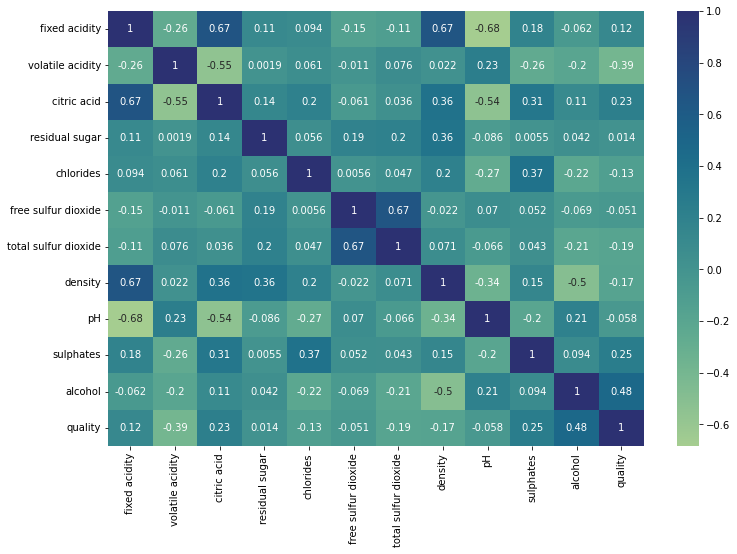

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='crest')

## Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [10]:
X = data.drop('quality',axis=1)
y = data.quality

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### StandardScaler
- This Scaler scales data to unit variance. But the scaler is affected by outliers while calculating mean and standard deviation. StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
- Most of the after scaling lies in [-2, 4].

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scale_train = scaler.transform(X_train)

In [13]:
model = SVC()
model.fit(X_scale_train,y_train)

SVC()

In [14]:
model.score(X_scale_train,y_train)

0.6794370602032838

In [15]:
X_scale_test = scaler.transform(X_test)
prediction = model.predict(X_scale_test)

In [16]:
accuracy_score(y_test,prediction)

0.603125

##### MinMaxScaler
- MinMaxScaler scales data using minimum and maximum values of features and transfers the values in range [0, 1].
- This scaler is sensitive to outliers like the one before.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scale_train = scaler.transform(X_train)

In [19]:
model.fit(X_scale_train,y_train)

SVC()

In [20]:
model.score(X_scale_train,y_train)

0.6505082095387021

In [21]:
X_scale_test = scaler.transform(X_test)
prediction = model.predict(X_scale_test)

In [22]:
accuracy_score(y_test,prediction)

0.596875

##### MaxAbsScaler
- This scaler is similar to MinMaxScaler, but it also deals with negative values. The positive values are ranged in [0, 1] and negative values are ranged in [-1, 0].

In [23]:
from sklearn.preprocessing import MaxAbsScaler

In [24]:
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_scale_train = scaler.transform(X_train)

In [25]:
model.fit(X_scale_train,y_train)

SVC()

In [26]:
model.score(X_scale_train,y_train)

0.5942142298670836

In [27]:
X_scale_test = scaler.transform(X_test)
prediction = model.predict(X_scale_test)

In [28]:
accuracy_score(y_test,prediction)

0.565625

##### RobustScaler
- This scaler is different from the previous scalers. The scaler is based on percentiles and is not influenced by small number of outliers.

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
scaler = RobustScaler()
scaler.fit(X_train)
X_scale_train = scaler.transform(X_train)

In [31]:
model.fit(X_scale_train,y_train)

SVC()

In [32]:
model.score(X_scale_train,y_train)

0.6684910086004691

In [33]:
X_scale_test = scaler.transform(X_test)
prediction = model.predict(X_scale_test)

In [34]:
accuracy_score(y_test,prediction)

0.60625

##### PowerTransform
- This transformer increases Gaussian-ness of the data i.e. it stabilizes the variance and minimize skewness. It transfers data so that mean is 0 and variance is 1.

In [35]:
from sklearn.preprocessing import PowerTransformer

In [36]:
scaler = PowerTransformer()
scaler.fit(X_train)
X_scale_train = scaler.transform(X_train)

In [37]:
model.fit(X_scale_train,y_train)

SVC()

In [38]:
model.score(X_scale_train,y_train)

0.6817826426896012

In [39]:
X_scale_test = scaler.transform(X_test)
prediction = model.predict(X_scale_test)

In [40]:
accuracy_score(y_test,prediction)

0.58125